In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('brain tumor.csv')
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sb
from PIL import Image
from IPython.display import HTML, display


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from zipfile import ZipFile
from io import BytesIO

# Image manipulation.
import PIL.Image
from IPython.display import display



import os

import sys               
import time              
import pickle     
import numpy as np
import pandas as pd
import skimage.measure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

#import xgboost as xgb


In [ ]:
df[df['Class']==1]['Image']

zip_path = 'brain tumor .zip'
with ZipFile(zip_path) as myzip:
    files_in_zip = myzip.namelist()

with ZipFile(zip_path) as myzip:
    with myzip.open(files_in_zip[3]) as myfile:
        img = Image.open(myfile)
        



# Load the picture 

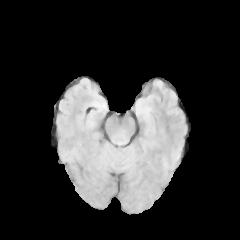

In [46]:
def image_open(i):
    
    #load the zip file 
    zip_path = 'barin tumor.zip'
    with ZipFile(zip_path) as myzip:
        files_in_zip = myzip.namelist()
   
    with ZipFile(zip_path) as myzip:
        with myzip.open(files_in_zip[i]) as myfile:
            img = Image.open(myfile)
            
    
    
  
    
    
    return files_in_zip,img


file,imag=image_open(100)
imag

#imag=image.imread((imag))

image = np.clip(image/255.0, 0.0, 1.0)
image

In [139]:

print(image.size)
print(image.format)
print(image.mode)

AttributeError: module 'matplotlib.image' has no attribute 'size'

In [140]:
Image.open('jabed1.jpg').mode


'RGB'

# load image using matplotlib

(1440, 2560, 3)
uint8


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

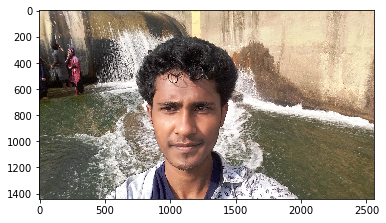

In [4]:
from matplotlib import image

image=image.imread(('jabed1.jpg'))
print(image.shape)
print(image.dtype)
plt.imshow(image)
plt

# now convert to numpy array 

### Convert to NumPy Array and Back

In Python, Pillow is the most popular and standard library when it comes to working with image data.

NumPy uses the asarray() class to convert PIL images into NumPy arrays. The np.array function also produce the same result. The type function displays the class of an image.

The process can be reversed using the Image.fromarray() function. This function comes in handy when the manipulation is performed on numpy.ndarray image data, that we laterwant to save as a PNG or JPEG file. 

In [5]:
from PIL import Image
from numpy import asarray
image=Image.open('jabed1.jpg')
data=asarray(image) #image convert to array
print(data.shape)


image2=Image.fromarray(data)


(1440, 2560, 3)


# convert image to grascale

In [6]:

im = np.array(Image.open('jabed1.jpg').convert('L')) #you can pass multiple arguments in single line
print(type(im))
gr_im= Image.fromarray(im).save('gr_kolala.png')


<class 'numpy.ndarray'>


In [7]:
resize=np.array(Image.open('jabed1.jpg').convert('L').resize((200,200)))



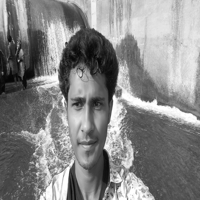

In [8]:
Image.fromarray(resize)

# trimming the image

In [9]:
im = np.array(Image.open('jabed1.jpg'))

print("Before trimming:",im.shape)

im_trim = im[500:1200, 500:1500]
print("After trimming:",im_trim.shape)

trim=Image.fromarray(im_trim).save('trim_jabed.jpg')
trim

Before trimming: (1440, 2560, 3)
After trimming: (700, 1000, 3)


In [10]:


def load_image_blackandwhite(filename):
    #image = PIL.Image.open(filename)

    image = PIL.Image.open(filename) # open colour image
    image = image.convert('L') # convert image to black and white
    image = np.array(image)
    
    return np.float32(image)



## load the image to array

In [11]:
def plot_image(image):
    # Assume the pixel-values are scaled between 0 and 255.
    
    # Convert the pixel-values to the range between 0.0 and 1.0
    image = np.clip(image/255.0, 0.0, 1.0)
        
    # Plot using matplotlib.
    plt.imshow(image, interpolation='lanczos')
    plt.show()

In [12]:
def reshape_image(image_file, new_wigth, new_height):
    
    ############
    # Reduce Size of Image
    ############
    
    olddim = np.shape(image_file)
    img = np.zeros((new_wigth,new_height))
    newdim = np.shape(img)
        
    for r in range(newdim[0]):
        if (newdim[0] <= olddim[0]):
            centerx=(r)/newdim[0]*olddim[0]
            lowerx=max(0,int(round(centerx-olddim[0]/newdim[0]/2,0)))
            upperx=min(olddim[0],int(round(centerx+olddim[0]/newdim[0]/2,0))+1)
        else:
            lowerx=max(0,int(r*olddim[0]/newdim[0]))
            upperx=min(lowerx+1,olddim[0]-1)+1
            
        for c in range(newdim[1]):  
            if (newdim[1] <= olddim[1]):
                centery=(c)/newdim[1]*olddim[1]
                lowery=max(0,int(round(centery-olddim[1]/newdim[1]/2,0)))
                uppery=min(olddim[1],int(round(centery+olddim[1]/newdim[1]/2,0))+1)
            else:
                lowery=max(0,int(c*olddim[1]/newdim[1]))
                uppery=min(lowery+1,olddim[1]-1)+1
            img[r,c] = np.mean(image_file[ lowerx:upperx, lowery:uppery ])

                
    return img

'Image1.jpg'

In [14]:


image = load_image_blackandwhite(filename=BytesIO(archive.read(archive.namelist()[150])))
image.shape



(240, 240)

In [15]:
df.head()

Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e-155  
2       5.981800     0.978014  7.458341e-155  
3       7.700919     0.964189  7.458341e-155  
4       6.834689     0.972789  7.458341e-155

In [16]:
nbr_images=df.shape[0]
print('number of image ', nbr_images)

number of image  3762


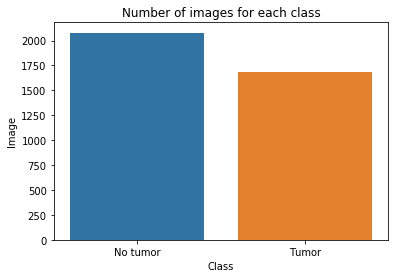

In [17]:

temp_df = df.groupby('Class').count()
temp_df.reset_index(inplace=True)
temp_df.iloc[0,0]='No tumor'
temp_df.iloc[1,0]='Tumor'
sb.barplot(data = temp_df, x='Class', y='Image')
plt.title('Number of images for each class');

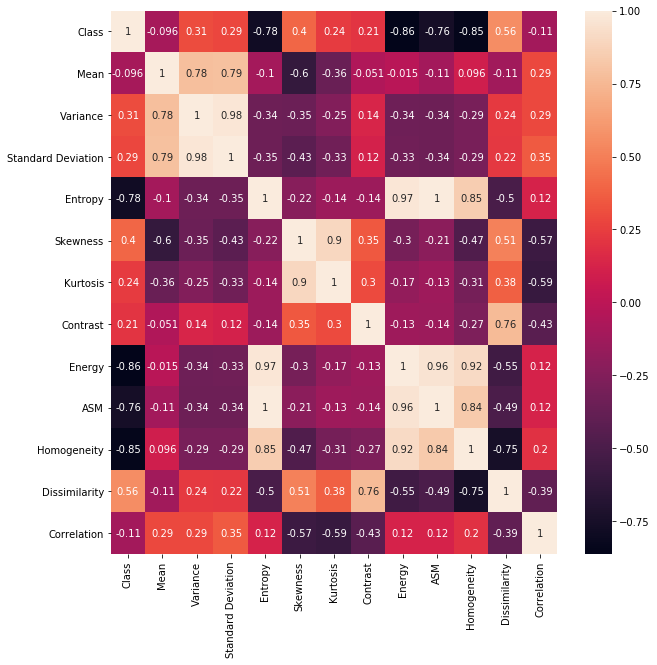

In [18]:
plt.figure(figsize=(10,10))
sb.heatmap(df.iloc[:,1:df.shape[1]-1].corr(), annot=True);

In [19]:
df_new=df.iloc[:,2:]
df_new.drop('Coarseness',axis=1,inplace=True)
df_new





Mean     Variance  Standard Deviation   Entropy  Skewness  \
0      6.535339   619.587845           24.891522  0.109059  4.276477   
1      8.749969   805.957634           28.389393  0.266538  3.718116   
2      7.341095  1143.808219           33.820234  0.001467  5.061750   
3      5.958145   959.711985           30.979219  0.001477  5.677977   
4      7.315231   729.540579           27.010009  0.146761  4.283221   
...         ...          ...                 ...       ...       ...   
3757  21.234512  1208.850174           34.768523  0.063774  2.082079   
3758  20.435349  1227.151440           35.030721  0.066763  2.144625   
3759  18.011520  1151.582765           33.934978  0.068396  2.308349   
3760  13.330429   945.732779           30.752769  0.087872  2.732822   
3761   6.110138   480.884025           21.929068  0.118171  4.110669   

       Kurtosis    Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
0     18.900575   98.613971  0.293314  0.086033     0.530941       4.473346   
1     14.464618   63.858816  0.475051  0.225674     0.651352       3.220072   
2     26.479563   81.867206  0.031917  0.001019     0.268275       5.981800   
3     33.428845  151.229741  0.032024  0.001026     0.243851       7.700919   
4     19.079108  174.988756  0.343849  0.118232     0.501140       6.834689   
...         ...         ...       ...       ...          ...            ...   
3757   4.647310  158.437600  0.220666  0.048693     0.487131       5.211739   
3758   4.882034  161.158675  0.225931  0.051045     0.502712       5.083126   
3759   5.579498  167.130118  0.228930  0.052409     0.492269       5.103700   
3760   7.757570  223.812932  0.261527  0.068397     0.480064       6.439784   
3761  17.538826  239.251388  0.306224  0.093773     0.494333       6.787329   

      Correlation  
0        0.981939  
1        0.988834  
2        0.978014  
3        0.964189  
4        0.972789  
...           ...  
3757     0.950972  
3758     0.952749  
3759     0.952181  
3760     0.940898  
3761     0.938731  

[3762 rows x 12 columns]

In [20]:
def normalize_data(data):
    
    mean=np.mean(data,axis=0)
    std=np.std(data)
    normalize=(data-mean)/std
    
    return normalize

normalize=normalize_data(df_new)
normalize

Mean  Variance  Standard Deviation   Entropy  Skewness  Kurtosis  \
0    -0.515700 -0.195790           -0.033144  0.504650  0.067855 -0.097267   
1    -0.129018  0.202943            0.365594  2.746050 -0.150204 -0.175881   
2    -0.375013  0.925765            0.984680 -1.026708  0.374531  0.037048   
3    -0.616481  0.531896            0.660820 -1.026561  0.615188  0.160202   
4    -0.379529  0.039451            0.208352  1.041256  0.070489 -0.094103   
...        ...       ...                 ...       ...       ...       ...   
3757  2.050827  1.064921            1.092779 -0.139892 -0.789131 -0.349862   
3758  1.911290  1.104076            1.122668 -0.097345 -0.764704 -0.345702   
3759  1.488082  0.942399            0.997760 -0.074100 -0.700765 -0.333342   
3760  0.670746  0.501988            0.635006  0.203090 -0.534994 -0.294742   
3761 -0.589942 -0.492543           -0.370847  0.634342  0.003102 -0.121400   

      Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation  
0    -0.268050  0.685118  0.470073     0.404100      -0.121709     1.000713  
1    -0.585492  2.090287  2.865580     1.345457      -0.799181     1.264377  
2    -0.421010 -1.335981 -0.988340    -1.649391       0.693704     0.850636  
3     0.212525 -1.335154 -0.988223    -1.840334       1.622995     0.322041  
4     0.429532  1.075849  1.022442     0.171115       1.154744     0.650854  
...        ...       ...       ...          ...            ...          ...  
3757  0.278359  0.123407 -0.170487     0.061596       0.277439    -0.183335  
3758  0.303212  0.164116 -0.130150     0.183409       0.207915    -0.115377  
3759  0.357754  0.187301 -0.106751     0.101766       0.219037    -0.137095  
3760  0.875475  0.439344  0.167517     0.006346       0.941273    -0.568517  
3761  1.016485  0.784933  0.602848     0.117900       1.129143    -0.651387  

[3762 rows x 12 columns]

In [21]:
# Normalization function.
# Normalize the input so that its distribution becomes N(0,1).

def normalize(data):
    mean = np.mean(data, axis=1)
    std = np.std(data, axis=1)
    data_normalized = (data - mean)/std
    return data_normalized





In [22]:


# Initialization function.
# Initializing the weights using a modified He initialization to avoid exploding or vanishing gradients.

def initialize_weights_bias(layer_dims):
    L = len(layer_dims)                     
    params = {}
    for l in range(1, L):
        params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/(layer_dims[l-1]+layer_dims[l]))
        params['b' + str(l)] = np.zeros((1, layer_dims[l]))
    return params



In [23]:


# Activation functions.
# Calculate the activation using a ReLU or a Sigmoid function.

def activation(activation_types, Z):
    if (activation_types == 'sigmoid'):
        s = 1/(1+np.exp(-Z))
    else:
        s = np.maximum(np.zeros(Z.shape), Z)  # Z must be np.array
    return s



In [24]:
# Derivative of the activation functions.

def activation_derivative(activation_types, Z):
    if (activation_types == 'sigmoid'):
        s = np.multiply(activation('sigmoid', Z),(1 - activation('sigmoid', Z)))
    else:
        s = np.maximum(np.zeros(Z.shape), Z)
        s[s!=0] = 1
    return s

In [25]:

def forward_pass(X, params, layer_dims, activation_types):
    L = len(layer_dims)
    cache={}
    A = X
    cache['A0'] = X
    for l in range(1, L):
        Z = np.dot(A,params['W' + str(l)].T) + params['b' + str(l)]
        A = activation(activation_types[l-1], Z)
        cache['Z' + str(l)] = Z
        cache['A' + str(l)] = A
    return A, cache

In [26]:


# Loss function.
# Calculates the cross entropy loss between the predicted and true classes.

def cross_entropy_cost(Yhat, Y, params, lamda):
    m = Y.shape[0]
    L = int(len(params)/2)
    L2_reg = 0
    for l in range(1,L+1):
        L2_reg += np.linalg.norm(params['W' + str(l)])**2
    cost = -(1/m)*(np.dot(np.log(Yhat.T),Y)+np.dot(np.log(1-Yhat.T),(1-Y))) + (lamda/(2*m))*L2_reg
    cost = np.squeeze(cost)
    return cost



In [27]:
def back_prop(Y, Yhat, cache, params, activation_types, lamda):
    grads = {}
    L = int(len(cache)/2)+1
    dYhat = - (np.divide(Y, Yhat) - np.divide(1 - Y, 1 - Yhat))
    m = Y.shape[0]
    for l in reversed(range(1,L)):
        dZ = np.multiply(dYhat, activation_derivative(activation_types[l-1], cache['Z'+str(l)]))
        dW = (1/m)*np.dot(dZ.T, cache['A'+str(l-1)]) + (lamda/m)*params['W' + str(l)]
        db = (1/m)*np.sum(dZ, axis=0, keepdims=True)
        dA_prev = np.dot(dZ, params['W'+str(l)])                 
        dYhat = dA_prev
        grads["dA" + str(l-1)] = dA_prev
        grads["dW" + str(l)] = dW
        grads["db" + str(l)] = db
        assert (dW.shape == params['W'+str(l)].shape)
        assert (db.shape == params['b'+str(l)].shape)
    return grads

In [28]:
def update_parameters(parameters, grads, learning_rate, L):
    for l in range(1,L):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]
    return parameters

In [29]:
def model(X_train,X_val,X_test,Y_train,Y_val,Y_test, model_config):
    
    i=0
    conv = 1
    cost_history={
        'Train_loss': [],
        'Val_loss': []
    }
    
    learning_rate = model_config['learning_rate']
    lamda = model_config['lamda']
    layer_dims = model_config['layer_dims']
    activation_types = model_config['activation_types']
    max_iter = model_config['max_iter']
    params = initialize_weights_bias(layer_dims)
    L = len(layer_dims)
    
    toolbar_width = 20
    sys.stdout.write("[%s]" % ("" * toolbar_width))
    sys.stdout.flush()
    sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['
    start = time.time()
    
    while (i<max_iter)&(conv>10e-7):
        Yhat, cache = forward_pass(X_train, params, layer_dims, activation_types)
        Yhat_val, _ = forward_pass(X_val, params, layer_dims, activation_types)
        cost_train = cross_entropy_cost(Yhat, Y_train, params, lamda)
        cost_val = cross_entropy_cost(Yhat_val, Y_val, params, lamda)
        
        grads = back_prop(Y_train, Yhat, cache, params, activation_types, lamda)
        params = update_parameters(params, grads, learning_rate, L)
        
        cost_history['Train_loss'].append(cost_train)
        cost_history['Val_loss'].append(cost_val)
        
        if i>2:
            conv = np.abs(cost_history['Train_loss'][-1]-cost_history['Train_loss'][-2])
        i+=1
        if i%100==0:
            sys.stdout.write("=")
            sys.stdout.flush()
    sys.stdout.write("]\n") # this ends the progress bar
    
    end = time.time()
    training_dur = end-start
    train_accuracy = accuracy_score(Y_train, np.round(Yhat))
    
    Yhat_test, _ = forward_pass(X_test, params, layer_dims, activation_types)
    test_accuracy = accuracy_score(Y_test, np.round(Yhat_test))
    conf_matrix = confusion_matrix(Y_test, np.round(Yhat_test), normalize='true')
    
    F1_score = f1_score(Y_test, np.round(Yhat_test))
    
    Model_infos={
        'Train_acc': train_accuracy,
        'Test_acc': test_accuracy,
        'conf_matrix': conf_matrix,
        'Train_dur': training_dur,
        'F1_score': F1_score
    }
    return cost_history, params, Model_infos

In [30]:
def GridSearch(learning_rates, lamdas, model_config):
    best_F1 = 0
    results = {}
    models_cost_history = []
    models_params = []
    Best_model = {}
    m=1
    print('-------------- Beginning of Grid Search --------------')
    print('------------------ Training Models -------------------')
    for i in range(len(learning_rates)):
        for j in range(len(lamdas)):
            model_config['learning_rate'] = learning_rates[i]
            model_config['lamda'] = lamdas[j]
            print('Training of Model '+str(m)+' (Learning rate: '+str(learning_rates[i]) + ' Lambda: ' + str(lamdas[j])+')' )
            cost_history, params, Model_infos = model(X_train_img,X_val_img,X_test_img,Y_train,Y_val,Y_test, model_config)
            print('Training duration: ' + str(Model_infos['Train_dur']/60)  + 'min')
            print('Number of epochs: ' + str(int(len(cost_history['Train_loss']))))
            print('Train accuracy: ' + str(Model_infos['Train_acc']) + ' | ' + 'Test accuracy: ' +
                  str(Model_infos['Test_acc'])+ ' | ' + 'F1 score: ' + str(Model_infos['F1_score']))
            results['Model: '+ str(learning_rates[i]) + ' ' + str(lamdas[j])] = Model_infos
            models_cost_history.append(cost_history)
            if Model_infos['F1_score']>best_F1:
                best_F1 = Model_infos['F1_score']
                Best_model['infos'] = Model_infos
                Best_model['cost_history'] = cost_history
                Best_model['params'] = params  
                Best_model['hyperparams'] = (learning_rates[i],lamdas[j])
            m+=1
            print('')
    print('--------------------- Best Model ---------------------')
    print('Best F1 score: ' + str(Best_model['infos']['F1_score']))
    print('Best hyper-parameters: Learning rate: ' + str(Best_model['hyperparams'][0]) + ' ' +
          'Lambda: '+ str(Best_model['hyperparams'][1]))
    print('----------------- End of Grid Search -----------------')
    return results, models_cost_history, Best_model

In [31]:


labels = np.array(df.iloc[:,1])

In [32]:


# Normalizing the tabular data (numeric features)

data = df.iloc[:,2:]
Data_normalized = normalize_data(df_new)

Data_normalized

Mean  Variance  Standard Deviation   Entropy  Skewness  Kurtosis  \
0    -0.515700 -0.195790           -0.033144  0.504650  0.067855 -0.097267   
1    -0.129018  0.202943            0.365594  2.746050 -0.150204 -0.175881   
2    -0.375013  0.925765            0.984680 -1.026708  0.374531  0.037048   
3    -0.616481  0.531896            0.660820 -1.026561  0.615188  0.160202   
4    -0.379529  0.039451            0.208352  1.041256  0.070489 -0.094103   
...        ...       ...                 ...       ...       ...       ...   
3757  2.050827  1.064921            1.092779 -0.139892 -0.789131 -0.349862   
3758  1.911290  1.104076            1.122668 -0.097345 -0.764704 -0.345702   
3759  1.488082  0.942399            0.997760 -0.074100 -0.700765 -0.333342   
3760  0.670746  0.501988            0.635006  0.203090 -0.534994 -0.294742   
3761 -0.589942 -0.492543           -0.370847  0.634342  0.003102 -0.121400   

      Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation  
0    -0.268050  0.685118  0.470073     0.404100      -0.121709     1.000713  
1    -0.585492  2.090287  2.865580     1.345457      -0.799181     1.264377  
2    -0.421010 -1.335981 -0.988340    -1.649391       0.693704     0.850636  
3     0.212525 -1.335154 -0.988223    -1.840334       1.622995     0.322041  
4     0.429532  1.075849  1.022442     0.171115       1.154744     0.650854  
...        ...       ...       ...          ...            ...          ...  
3757  0.278359  0.123407 -0.170487     0.061596       0.277439    -0.183335  
3758  0.303212  0.164116 -0.130150     0.183409       0.207915    -0.115377  
3759  0.357754  0.187301 -0.106751     0.101766       0.219037    -0.137095  
3760  0.875475  0.439344  0.167517     0.006346       0.941273    -0.568517  
3761  1.016485  0.784933  0.602848     0.117900       1.129143    -0.651387  

[3762 rows x 12 columns]

In [33]:
data_nor_df=pd.DataFrame(Data_normalized)
images_df = pd.DataFrame(df.iloc[:,0:1])
data_concat=pd.concat([images_df,data_nor_df],axis=1)
data_concat.head()

Image      Mean  Variance  Standard Deviation   Entropy  Skewness  \
0  Image1 -0.515700 -0.195790           -0.033144  0.504650  0.067855   
1  Image2 -0.129018  0.202943            0.365594  2.746050 -0.150204   
2  Image3 -0.375013  0.925765            0.984680 -1.026708  0.374531   
3  Image4 -0.616481  0.531896            0.660820 -1.026561  0.615188   
4  Image5 -0.379529  0.039451            0.208352  1.041256  0.070489   

   Kurtosis  Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
0 -0.097267 -0.268050  0.685118  0.470073     0.404100      -0.121709   
1 -0.175881 -0.585492  2.090287  2.865580     1.345457      -0.799181   
2  0.037048 -0.421010 -1.335981 -0.988340    -1.649391       0.693704   
3  0.160202  0.212525 -1.335154 -0.988223    -1.840334       1.622995   
4 -0.094103  0.429532  1.075849  1.022442     0.171115       1.154744   

   Correlation  
0     1.000713  
1     1.264377  
2     0.850636  
3     0.322041  
4     0.650854

In [34]:
data_concat.shape

(3762, 13)

In [35]:
len(labels)

3762

In [36]:
#splitting the data into train/validation/test sub-sets

In [37]:
np.random.seed(7)
x_train,x_test,y_train,y_test=train_test_split(data_concat,labels,test_size=0.2,random_state=7)


In [38]:
x_train,x_val,y_train,y_val=train_test_split(data_concat,labels,test_size=0.10,random_state=7)
#
y_train=y_train.reshape(y_train.shape[0],1)

y_val=y_val.reshape(y_val.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)


In [39]:
# This function is used to seperate the image data from the tabular data for each sub-set, 
# and converts the images into a smaller shape (120-by-120px) using a MaxPooling function.
# The images are then stored in a numpy array.


In [41]:
def image_feat_separator(data):
    images_names_list = list(data.iloc[:,0])
    feat_df = data.iloc[:,1:]
    path_list=[]
    images_list=[]
    for i in images_names_list:
        path = r"C:\Users\jabed\Desktop\brain image"+i+".jpg"
        path_list.append(path)
    for i in path_list:
        temp = Image.open(i).convert('L')
        array_temp = np.asarray(temp)
        max_pooling_temp = skimage.measure.block_reduce(array_temp, (2,2), np.max)
        flat_temp = list(max_pooling_temp.flatten())
        images_list.append(flat_temp)
        temp.close()
    images_array = np.array(images_list)
    return images_array, feat_df

In [44]:
image_feat_separator(x_train)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jabed\\Desktop\\brain imageImage2224.jpg'

In [42]:
X_train_img, X_train_feat = image_feat_separator(x_train)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jabed\\Desktop\\brain imageImage2224.jpg'

True

In [ ]:
DIRECTORY=r'C:\Users\jabed\Desktop\mask and not mask\train'
CATEGORIES=['with mask','without mask']

data=[]
labels=[]
for category in CATEGORIES:
    path=os.path.join(DIRECTORY,category)
    for img in os.listdir(path):
        img_path=os.path.join(path,img)
        image=load_img(img_path,target_size=(224,224))
        data.append(image)
        labels.append(category)   